In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
import math

# Problem 1

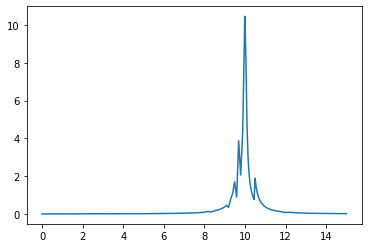

In [2]:
"""
Work ou the field from the spherical shell. Take a ring,expand to the shell for z<R and z>R. 

"""

σ = 2 * 10**-13 # surface density 
R = 10 # radius of the shell
ϵ_o = 8.85 * 10**-12 
z_l_R = np.linspace(0, R-0.01, 101) # inside of the shell, values at z = R excluded
z_b_R = np.linspace(R, 15, 101) # outside of the shell and at z = R
z = np.hstack([z_l_R, z_b_R])
E_f = []
r = []
for i in range(len(z)):
    E = lambda θ: (1/(4*np.pi*ϵ_o)) * σ * R**2 * (z[i] - R * np.cos(θ * 180/np.pi))/(R**2 + z[i]**2 + 2*R*z[i]*np.cos(θ*  180/np.pi))**(3/2)  
    r.append(z[i])
    E_f.append(sp.integrate.quad(E, 0, np.pi)[0])
    
plt.plot(r, E_f)





# Problem 2

# Problem 3

Error is:  7.58174689141421e-06


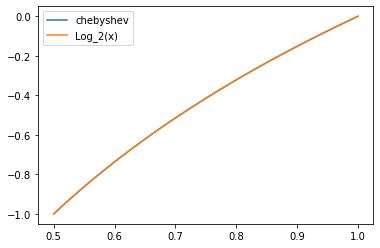

In [19]:
deg = 6
x = np.linspace(0.5, 1, 1001)
fun = math.log2
y = []
for i in range(len(x)):
    y.append(fun(x[i])) # finding log2(x) functions

cheb = np.polynomial.chebyshev.chebfit(x, y, deg - 1 ) # Chebyshev Coefficients 

def chebyshev_pol(x, cheb):
    yy = []
    for i in range(len(x)):
        p = 0 # p(x) 
        T = [1] # list of Chebyshev polynomials (defined separately for each x)
        for j in range(deg):
            if j == 0:
                p = p + cheb[j] *  T[0] # first term of the polynomial with c_0
            elif j == 1:
                T.append(x[i])
                p += cheb[j] * T[1] # second term of the polynomial with c_1
            else:
                p += cheb[j]  * (2*x[i] *T[j-1] - T[j-2]) # following terms of the polynomial
                T.append(2*x[i] *T[j-1] - T[j-2]) 
                
        yy.append(p)
    
    return yy


plt.plot(x, chebyshev_pol(x, cheb) , label = 'chebyshev')
plt.plot(x, y, label = 'Log_2(x)')
plt.legend()

print('Error is: ', np.sqrt(np.mean((np.array(y) - np.array(chebyshev_pol(x, cheb)))**2)))
